<a href="https://colab.research.google.com/github/SamDavies114/pyTorchDeepLearnIntro/blob/main/Copy_of_NLP_Excercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial: Text data processing

**Note:** Python 3.x is required to run this code.

## Objective

The objective of the tutorial is to experiment with different models and techniques for Natural Language Processing and check the
difference by visualising the dataset. Try to explore how different tokenization techniques have an impact on the document representation.
You can also check if removing punctuation has a significant impact on how the data looks like.


## Libraries

- pandas: ```pip install pandas```
- sklearn: ```pip install sklearn```
- seaborn: ```pip install seaborn```
- umap: ```pip install umap-learn```
- spacy: ```pip install spacy``` and ```python -m spacy download en_core_web_sm```
- nltk: ```pip install nltk```
- sentence-transformers: ```pip install sentence-transformers```

## Dataset

The datasets can be downloaded from https://imperialcollegelondon.box.com/s/adnhlskleb1iiwvzal7gq68vqx8ijr0l

# Set things up

In [ ]:
# setup the data environment and download the datasets
!mkdir -p data
!wget https://imperialcollegelondon.box.com/shared/static/0z2tcswah3wbqxyfle9ihw2hnoio8d3d.csv -O data/tweets.csv
!wget https://imperialcollegelondon.box.com/shared/static/dikdtlvl9wd8hdtko8th0eul7vwx4hf0.csv -O data/email_spam.csv

In [ ]:
!pip install umap-learn
!pip install sentence-transformers

# Simple Text

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import spacy
from nltk.stem.snowball import SnowballStemmer
from umap import UMAP
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer

In [ ]:
# spacy loading the english small model
nlp = spacy.load("en_core_web_sm")
# loading english snowball stemmer
stemmer = SnowballStemmer("english")

# loading a dataset
df = pd.read_csv("data/tweets.csv")
# keep the first 100 samples for quick processing
# you can adjust the number of samples to see what happens when you have more samples
df = df.head(500)
df.head(5)

In [ ]:
# get one document to experiment on
document = df["content"].values[2].strip()

# parse and tokenize the document
doc = nlp(document)
print("Text:", document)
for token in doc:
  print("\t", token.text, " -- lemma:", token.lemma_, " -- stem:", stemmer.stem(token.text))

## Exercise 1

1. What is the difference between the lemma and the stem?

2. Can you find a word where the lemma is different from the stem?

3. Is the lemma and the stem always an English word?

## Exercise 2

Calculate the average vector representation of a text document.

**Hint**: You must calculate the vector representation of the text first

In [ ]:
def average_vector(nlp, text):
  # todo; calculate the average vector reporesentation of a document
  return None

In [ ]:
# compute the average vector for the document
average_vector(nlp, document)

In [ ]:
# encode all documents
all_documents = np.array([average_vector(nlp, doc.strip()) for doc in df["content"].values])
print("All documents shape:", all_documents.shape)

x_t = UMAP().fit_transform(all_documents)
print("Projection shape:", x_t.shape)

## Exercise 3

Plot or display as text all the documents grouped by different categories, such as language, source or like count.

**Example**:

> sns.scatterplot(data=df, x=x_t[:, 0], y=x_t[:, 1], hue="lang", palette="tab10")



## Exercise 4

Use a sentence encoder to encode all documents and plot or display the results as text.

In [ ]:
model = SentenceTransformer('sentence-transformers/all-distilroberta-v1')

In [ ]:
def _encode(text: str):
  return None

In [ ]:
# encode all documents
all_documents = np.array([_encode(doc.strip()) for doc in df["content"].values])
print("All documents shape:", all_documents.shape)

x_t = UMAP().fit_transform(all_documents)
print("Projection shape:", x_t.shape)

All documents shape: (500, 768)
Projection shape: (500, 2)


<Axes: >

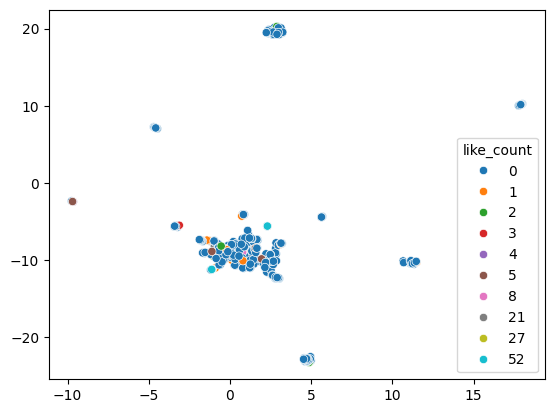

In [ ]:
sns.scatterplot(data=df, x=x_t[:, 0], y=x_t[:, 1], hue="like_count", palette="tab10")

# Advanced Text

## Exercise 5

Load the *data/email_spam.csv* dataset and cluster the spam text using KMeans. Compare the clusters with the spam label to identify the best parameters to solve the problem.

In [ ]:
def plot_model_clusters(x, y):
  sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, palette="tab10")

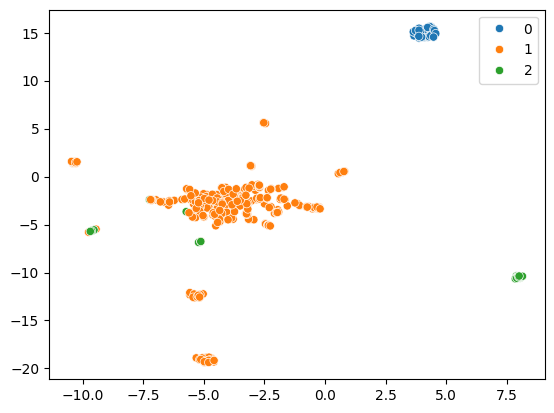

In [ ]:
k_model = None
plot_model_clusters(x=x_t, y=k_model.predict(all_documents))

## Exercise 6

**[Extra work]** Build a spam classifier and test its performance. See: https://scikit-learn.org/stable/modules/svm.html#classification